# Week 5 handin

## 01 Assignment
Here is the text for the assignment linked to

## 02 Status
Alle opgaverne undtagen de ekstra er løst

## 03 Solution part 1

In [1]:
#1.1, 1.2, 1.3
import pandas as pd
import requests

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&OMR%C3%85DE=000&K%C3%98N=TOT%2C1%2C2&CIVILSTAND=*&Tid=2008K1%2C2008K2%2C2008K3%2C2008K4%2C2020K1%2C2020K2%2C2020K3%2C2020K4'
data = pd.read_csv(url,sep=';')

data

,OMRÅDE,KØN,CIVILSTAND,TID,INDHOLD
0,All Denmark,Total,Total,2008Q1,5475791
1,All Denmark,Total,Total,2008Q2,5482266
2,All Denmark,Total,Total,2008Q3,5489022
3,All Denmark,Total,Total,2008Q4,5505995
4,All Denmark,Total,Total,2020Q1,5822763
...,...,...,...,...,...
115,All Denmark,Women,Divorced,2008Q4,244465
116,All Denmark,Women,Divorced,2020Q1,308456
117,All Denmark,Women,Divorced,2020Q2,310351
118,All Denmark,Women,Divorced,2020Q3,311694


<BarContainer object of 2 artists>

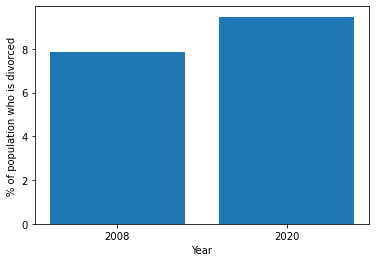

In [2]:
#1.5a What is the change in pct of divorced danes from 2008 to 2020

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&OMR%C3%85DE=000&K%C3%98N=TOT%2C1%2C2&CIVILSTAND=*&Tid=2008K1%2C2008K2%2C2008K3%2C2008K4%2C2020K1%2C2020K2%2C2020K3%2C2020K4'
df = pd.read_csv(url, sep=';')

ts_dk = df.loc[df['KØN']=='Total']
ts_2008 = ts_dk[ts_dk['TID']=='2008Q4']
ts_2020 = ts_dk[ts_dk['TID']=='2020Q4']

di = {'2008': (list(ts_2008.iloc[4])[4] / list(ts_2008.iloc[0])[4]) * 100, '2020': (list(ts_2020.iloc[4])[4] / list(ts_2020.iloc[0])[4]) * 100}
import matplotlib.pyplot as plt
x = list(di.keys())
y = list(di.values())
plt.figure()
plt.ylabel("% of population who is divorced", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.bar(x, y)



          OMRÅDE  Unmarriaged %
0     Copenhagen      65.489642
1         Aarhus      59.942282
2         Odense      55.196448
3        Aalborg      54.820118
4  Frederiksberg      58.475721


<BarContainer object of 5 artists>

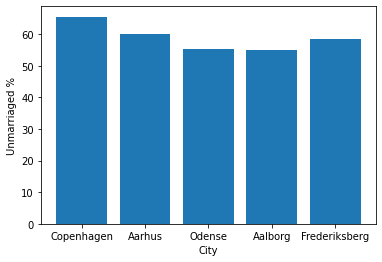

In [3]:
#1.5b Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

li_url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&OMR%C3%85DE=101%2C751%2C461%2C851%2C147&K%C3%98N=TOT&CIVILSTAND=TOT%2CU&Tid=2020K4'
df_opgave_to = pd.read_csv(li_url, sep=";")

df_tot = df_opgave_to.loc[df_opgave_to['CIVILSTAND']=='Total']
df_unmarried = df_opgave_to.loc[df_opgave_to['CIVILSTAND']=='Never married']

df_fin = pd.merge(df_tot, df_unmarried, left_on='OMRÅDE', right_on='OMRÅDE')
df_fin['Unmarriaged %'] = ((df_fin['INDHOLD_y'] / df_fin['INDHOLD_x']) * 100)
df_fin = df_fin.drop(['INDHOLD_x', 'INDHOLD_y', 'TID_y', 'TID_x', 'KØN_y', 'CIVILSTAND_y', 'KØN_x', 'CIVILSTAND_x'], axis=1)

print(df_fin)

x = df_fin['OMRÅDE']
y = df_fin['Unmarriaged %']
plt.figure()
plt.ylabel("Unmarriaged %", fontsize=10)
plt.xlabel("City", fontsize=10)
plt.bar(x, y)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

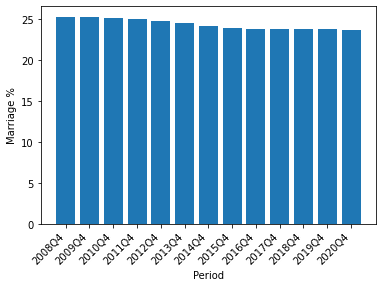

In [4]:
#1.5c Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

li_third_url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&OMR%C3%85DE=101&K%C3%98N=TOT&CIVILSTAND=TOT%2CG&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K4'
df_third = pd.read_csv(li_third_url, sep=";")

df_tot = df_third.loc[df_third['CIVILSTAND']=='Total']
df_married = df_third.loc[df_third['CIVILSTAND']=='Married/separated']

df_third_fin = pd.merge(df_tot, df_married, left_on='TID', right_on='TID')
df_third_fin['Marriage %'] = ((df_third_fin['INDHOLD_y'] / df_third_fin['INDHOLD_x']) * 100)
df_third_fin = df_third_fin.drop(['OMRÅDE_x', 'KØN_x', 'CIVILSTAND_x', 'OMRÅDE_y', 'KØN_y', 'CIVILSTAND_y', 'KØN_x', 'CIVILSTAND_x'], axis=1)

x = df_third_fin['TID']
y = df_third_fin['Marriage %']

plt.figure()
plt.ylabel("Marriage %", fontsize=10)
plt.xlabel("Period", fontsize=10)
plt.bar(x, y)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

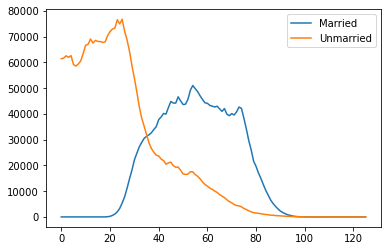

In [28]:
#1.5c Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

fourth_url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&ALDER=*&OMR%C3%85DE=000&K%C3%98N=TOT&CIVILSTAND=U%2CG&Tid=2020K4'

df_fourth = pd.read_csv(fourth_url, sep=";")
df_married = df_fourth.loc[df_fourth['CIVILSTAND']=='Married/separated']
df_married = df_married[1:]['INDHOLD']
df_unmarried = df_fourth.loc[df_fourth['CIVILSTAND']=='Never married']
df_unmarried = df_unmarried[1:]['INDHOLD']

plt.plot(range(0,126), df_married, label='Married')
plt.plot(range(0,126), df_unmarried, label='Unmarried')
plt.legend()